# Heart Disease Analysis

In [1]:
import pandas as pd
import numpy as np

In [5]:
# Load the Data

heart_data = pd.read_csv(filepath_or_buffer='heart.csv')


# Details about the Data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


1. The data set contains a total of 918 Observations of over 11 different attributes related to heart which help us to predict presence of heart disease
2. Total size of the data is 86 KiloBytes
3. There are total of 12 columns, Out of which 6 are Integer, 1 column with decimal values and remaining 5 are Strings

In [7]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
heart_data.describe([.25,.50,.75,.90])

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
90%,65.000000,160.000000,305.000000,1.000000,170.000000,2.300000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## High-level understanding of numerical data 

### Age

- **Minimum age** : 28 years,
- **Maximum age** : 77 years,
- **Average age** : 53 years,
- **25th Percentile (P25)** : 47 years (25% of the sample is 47 years old or younger)
- **90th Percentile (P90)** : 65 years (90% of the sample is 65 years old or younger)


### Resting Blood Pressure

- **Maximum Blood Pressure** : 200
- **Minimum Blood Pressure** : 0 

#### Minimum Blood Pressure has a recording of zero which seems to wrong. 

In [46]:
# Count the number of samples which are having resting blood pressure as zero
heart_data.head()
resting_bp=heart_data['RestingBP']
resting_bp[resting_bp > 0].count()

917

# Analysing sample which is having resting BP has zero so that it can be excluded 

In [52]:
heart_data[heart_data['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


### It is noted that this samle can be excluded if we are making any prediction which involves RestingBP,Cholesterol,FastingBS Since the data missing

In [61]:
heart_data_1 = heart_data.drop(449,axis=0)

In [77]:
#Verify number of samples after eliminating the excluded data
heart_data_1.shape[0]

917

In [78]:
heart_data_1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Resting Blood Pressure after removal of sample with zero values

- **Maximum Blood Pressure** : 200
- **Minimum Blood Pressure** : 80

### Cholesterol

- **Maximum Cholestral** : 917
- **Minimum Cholestral** : 0

  #### Minimum Cholesterol has a recording of zero which seems to Wrong. 

In [146]:
heart_data_1[heart_data_1['Cholesterol']==0].shape[0]

171

### Count the number of samples which are having Cholesterol as zero
### We cannot exclude all 171 values, 171 is approximately 18.66% of 918.
### We can use the mean value to replace samples with zero cholestrol

In [138]:
heart_data_1[heart_data_1['Cholesterol']!=0].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='index', ylabel='Cholesterol'>

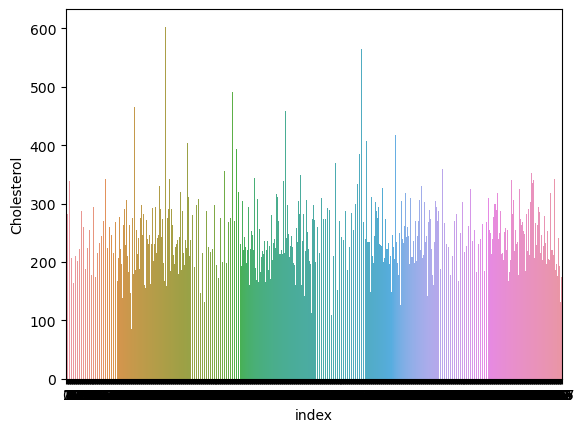

In [136]:

colestral_values_1 = heart_data_1[heart_data_1['Cholesterol']>0]
type(colestral_values)

df1 = colestral_values_1.reset_index()
type(df1)


sns.barplot(data=df1,x=df1['index'],y=df1['Cholesterol'])

### By looking at the above visualisation we can conclude that using mean value for further analysis can be done. Since there are outliers towards upper bound

In [161]:
heart_data_1['Cholesterol'].replace(0,value=heart_data_1['Cholesterol'].mean(),inplace=True)
heart_data_1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,236.128459,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,56.231401,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,199.016358,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### We can observe that after replacing the cholestrol with mean values there is no much deviation in the std and mean of Cholestrol column

### FastingBS 

### LDL Cholesterol - if greater 120 it is Bad (1) less than 120 is good (0)

*703 Samples* : Have value 1  

In [174]:
heart_data_1[heart_data_1['FastingBS'] == 0].shape[0]

703

## MaX Heart Rate

- **Maximum Max Heart Rate** : 202
- **Minimum Max Heart Rate** : 60

In [178]:
heart_data_1[heart_data_1['HeartDisease'] == 1].shape[0]

507

## Heart Disease 

- **Has Heart Disease** : 410
- **No Heart Disease** : 507


In [180]:
heart_data_1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [186]:
heart_data_1['Sex'].nunique()

2

In [ ]:
heart_data_1['Sex']

In [187]:
heart_data_1['Sex'].value_counts()

Sex
M    724
F    193
Name: count, dtype: int64

### Sex

- ** Male ** : 724
- ** FeMale ** : 193

In [190]:
heart_data_1['ChestPainType'].nunique()

4

In [191]:
heart_data_1['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    202
ATA    173
TA      46
Name: count, dtype: int64

## Chest Pain Type

## TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic

- **ASY** : 496
- **NAP** : 202
- **ATA**  : 173
- **TA** : 46



In [194]:
heart_data_1['RestingECG'].nunique()

3

In [196]:
heart_data_1['RestingECG'].value_counts()

RestingECG
Normal    551
LVH       188
ST        178
Name: count, dtype: int64

### RestingECG

- **Normal** : 551
- **LVH** : 188
- **ST**  : 178



In [198]:
### ExerciseAngina
heart_data_1['ExerciseAngina'].value_counts()

ExerciseAngina
N    546
Y    371
Name: count, dtype: int64

### ExerciseAngina - Personal feels heart pain during exercise

- **N** : 546
- **Y** : 371

In [201]:
heart_data_1['ST_Slope'].value_counts()

ST_Slope
Flat    459
Up      395
Down     63
Name: count, dtype: int64

## ST_Slope

Flat and Up are considered Normal 
down is considered to be having some cardio vascular disease

- **Flat** : 459
- **Up** : 395
- **Down** : 63

## Age & Heart disease

In [209]:
heart_data_1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


<Axes: xlabel='HeartDisease', ylabel='count'>

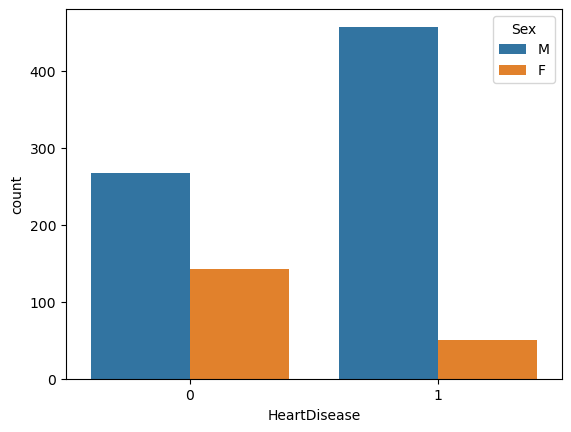

In [239]:
sns.categorical.countplot(heart_data_1,x='HeartDisease',hue='Sex')

<Axes: xlabel='Sex', ylabel='count'>

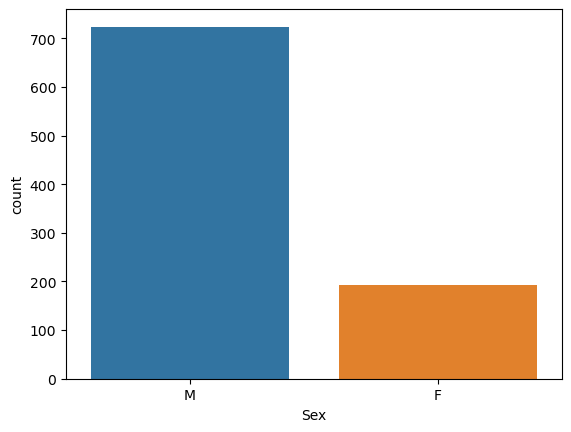

In [244]:

sns.categorical.countplot(heart_data_1,x='Sex')

<Axes: xlabel='RestingBP', ylabel='ST_Slope'>

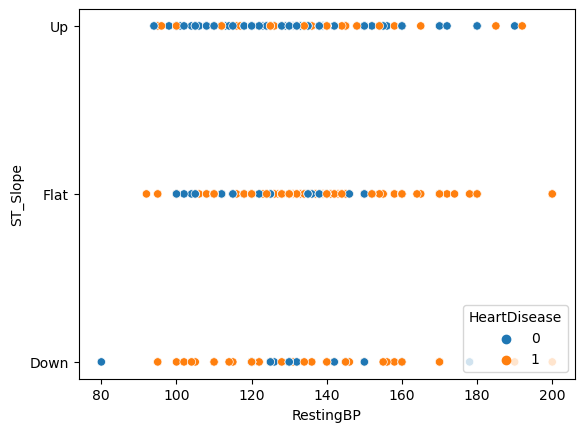

In [261]:
sns.relational.scatterplot(heart_data_1,x='RestingBP',y='ST_Slope',hue='HeartDisease')